# Линейная регрессия

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn.model_selection import train_test_split

**Описание данных**
 
$age:$ возраст <br>
$sex:$ пол <br>
$bmi:$ индекс массы тела <br>
$children:$ количество детей/входящих в страховку иждивенцев <br>
$smoker:$ курящий или нет <br>
$region:$ район проживания в США, северо-восток, юго-восток, юго-запад, северо-запад <br>
$charges:$ расходы по страховке <br>

In [3]:
df = pd.read_csv('datasets/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
def show_age_charges(df):
    plt.plot(df.age, df.charges, 'ro')
    plt.xlabel('age')
    plt.ylabel('charges')
    plt.title('Зависимость стоимости страховки от возраста')

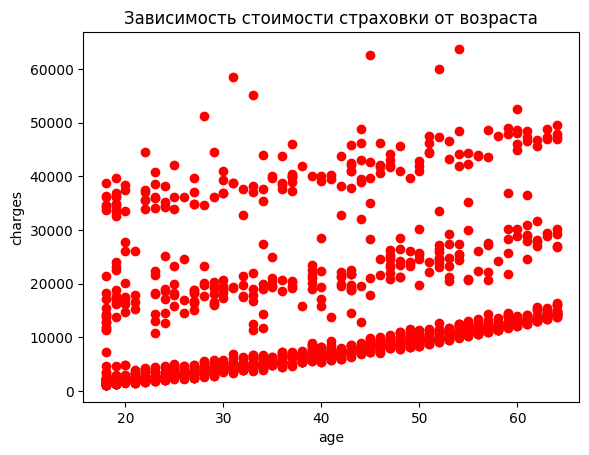

In [5]:
show_age_charges(df)

In [18]:
df_new = df[(df.children==0) & (df.charges < 15000) & (df.sex == 'female')]
df_new.shape

(228, 7)

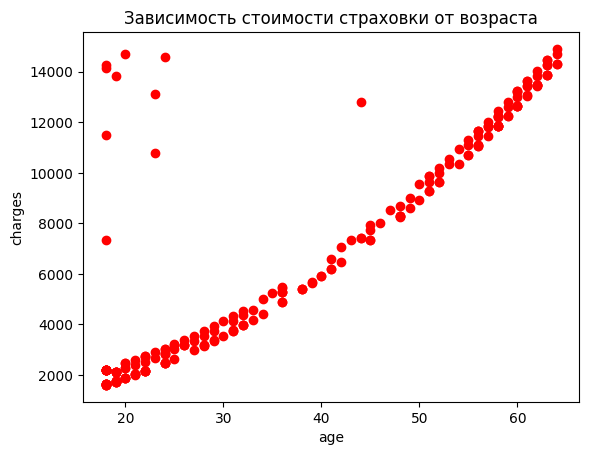

In [19]:
show_age_charges(df_new)

In [20]:
train, test = train_test_split(df_new, test_size=.2, random_state=42)

In [21]:
train.head()

,age,sex,bmi,children,smoker,region,charges
895,61,female,44.000,0,no,southwest,13063.88300
333,56,female,28.785,0,no,northeast,11658.37915
973,19,female,40.500,0,no,southwest,1759.33800
400,51,female,20.600,0,no,southwest,9264.79700
989,24,female,20.520,0,yes,northeast,14571.89080


In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [23]:
lr.fit(train[['age']], train.charges)

LinearRegression()

# MAE mean absolute error

In [25]:
true = [0, 100, 200]
pred = [0, 50, 250]

In [26]:
from sklearn.metrics import mean_absolute_error

In [27]:
mean_absolute_error(true, pred)

33.333333333333336

In [29]:
pred = lr.predict(test[['age']])
mean_absolute_error(test.charges, pred)

1556.1082486960813